In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def weekday_word(weekday):
    if weekday==0:
        return "Monday"
    elif weekday==1:
        return "Tuesday"
    elif weekday==2:
        return "Wednesday"
    elif weekday==3:
        return "Thursday"
    elif weekday==4:
        return "Friday"
    elif weekday==5:
        return "Saturday"
    else:
        return "Sunday"
    
def is_weekend(weekday):
    return weekday in [5,6]

In [3]:
f=pd.read_csv(r"C:\Users\Bruger\OneDrive - Danmarks Tekniske Universitet\Dokumenter\00- Introduction to Business Analytics\Project\Trips_2018.csv")

In [4]:
f.describe()

,Unnamed: 0,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender
count,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07
mean,8.774169e+06,9.887432e+02,1.589282e+03,4.073737e+01,-7.398260e+01,1.580830e+03,4.073704e+01,-7.398281e+01,2.656141e+04,1.978993e+03,1.148613e+00
std,5.065769e+06,1.889584e+04,1.439432e+03,3.225813e-02,1.912753e-02,1.438502e+03,3.206583e-02,1.919611e-02,6.222916e+03,1.192922e+01,5.438043e-01
min,0.000000e+00,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,4.387084e+06,3.580000e+02,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.029300e+04,1.969000e+03,1.000000e+00
50%,8.774169e+06,6.050000e+02,5.050000e+02,4.073818e+01,-7.398565e+01,5.050000e+02,4.073756e+01,-7.398602e+01,2.827000e+04,1.981000e+03,1.000000e+00
75%,1.316125e+07,1.060000e+03,3.249000e+03,4.075763e+01,-7.397283e+01,3.249000e+03,4.075725e+01,-7.397344e+01,3.185200e+04,1.989000e+03,1.000000e+00
max,1.754834e+07,1.951005e+07,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00


In [5]:

f['starttime'] = pd.to_datetime(f['starttime'], format='%Y-%m-%d %H:%M:%S.%f')
f['stoptime'] = pd.to_datetime(f['stoptime'], format='%Y-%m-%d %H:%M:%S.%f')
f['weekday']= f['starttime'].dt.weekday
f['is_weekend']=[is_weekend(el) for el in f['weekday']]
sm_dummies=pd.get_dummies(f, columns=['usertype'])

In [6]:
f.dtypes

Unnamed: 0                          int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                          int64
gender                              int64
weekday                             int64
is_weekend                           bool
dtype: object

In [7]:
sm_dummies.dtypes

Unnamed: 0                          int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
birth_year                          int64
gender                              int64
weekday                             int64
is_weekend                           bool
usertype_Customer                   uint8
usertype_Subscriber                 uint8
dtype: object

# Clustering

In [133]:
new_df = f.drop_duplicates(subset='start_station_id')[['start_station_id', 'start_station_latitude', 'start_station_longitude']]
new_df = new_df.set_index("start_station_id")

In [134]:
x=new_df[['start_station_longitude', 'start_station_latitude']]
len(x)

819

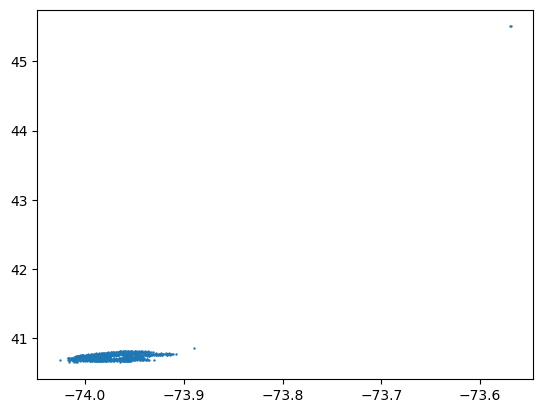

In [135]:
plt.scatter(x['start_station_longitude'],x['start_station_latitude'],s=0.5)

## DBScan

In [136]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(min_samples=30, eps=0.009) 
dbs.fit(x)

DBSCAN(eps=0.009, min_samples=30)

In [137]:
dbs.labels_

array([-1,  0,  0,  1,  1, -1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  1,  0,  0,  0,  1,  1,
       -1,  1, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  1,
        0,  0,  0,  0,  0, -1,  1, -1,  0,  1,  0,  0,  0, -1,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,
       -1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  1,  1,  1,  0,  0,
       -1,  1,  1, -1,  0,  0,  0,  0,  0,  1,  1,  0, -1,  0,  0,  0, -1,
        0,  1,  0, -1, -1,  1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,
       -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0, -1,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0, -1

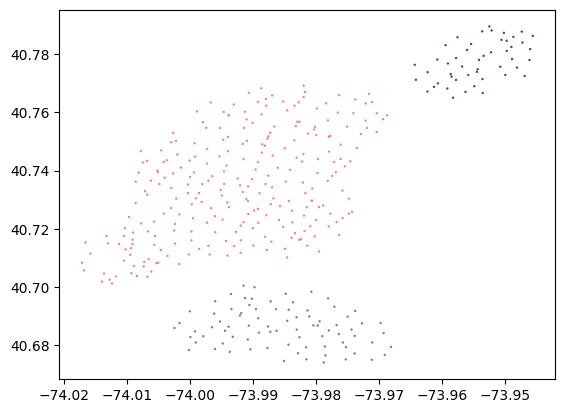

In [138]:
import random
from matplotlib import colors as mcolors

num_colors=len(set(dbs.labels_))-1   #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.CSS4_COLORS.keys())  #found this by searching "python color list"
cluster_colors=random.choices(colors, k=num_colors)
x_=[]
y_=[]
c_=[]
for label, x_val, y_val in zip(dbs.labels_, x['start_station_longitude'], x['start_station_latitude']):
    if label==-1:
        continue
    x_.append(x_val)
    y_.append(y_val)
    c_.append(cluster_colors[label])
#plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=0.5,c=c_)
plt.show()

## K-means

In [139]:
from sklearn.cluster import KMeans
K=20
k=KMeans(K)


In [140]:
k.fit(new_df)

KMeans(n_clusters=20)

In [141]:
dt_clusters=new_df.copy()
dt_clusters['cluster']=k.fit_predict(new_df)

In [142]:
dt_clusters

,start_station_latitude,start_station_longitude,cluster
start_station_id,,,
72.0,40.767272,-73.993929,7
79.0,40.719116,-74.006667,19
82.0,40.711174,-74.000165,19
83.0,40.683826,-73.976323,0
119.0,40.696089,-73.978034,0
...,...,...,...
3716.0,40.753599,-73.937956,5
3718.0,40.727464,-73.979504,9
3719.0,40.683223,-73.973812,0


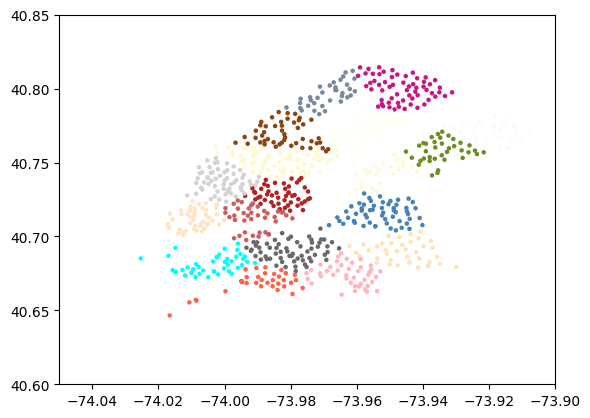

In [143]:
num_colors=K  #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.CSS4_COLORS.keys())  #found this by searching "python color list"
cluster_colors = random.choices(colors,k=K)  

x_points=dt_clusters["start_station_longitude"]
y_points=dt_clusters["start_station_latitude"]
# Get labels and cluster centers
labels = dt_clusters["cluster"]
x_=[]
y_=[]
c_=[]
for label, x, y in zip(labels, x_points, y_points):
    if label==-1:
        continue
    x_.append(x)
    y_.append(y)
    c_.append(cluster_colors[label])
#plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=5,c=c_)
plt.xlim(-74.05,-73.9)
plt.ylim(40.6,40.85)
plt.show()